## SSB30806: Assignment week 3

### Submission instructions:
This is the assignment of SBB30806 for week 3. You are free to use Python or R, and to submit this either as a Jupyter notebook or as a Word file with your results copied and pasted in there. Your files must be submitted to Brightspace by Friday 23:59. Submit to Assessment / Assignments / Week 3. The total number of points available is 10.


### Graded Assignment (week 3)
Consider some experiment in which the growth rate of a population of microorganisms may be modelled by the following model:
\begin{equation}
    \frac{dN}{dt}=rN\left(1-\frac{N}{K}\right)\left(\frac{N}{N+A}\right) \qquad \text{Eq. (1)}
\end{equation}
Here $N(t)$ is the local population size (cells/ml), time $t$ in days, $r$ is an intraspecific growth rate, and $K$ is the carrying capacity, i.e., the maximum size the population may achieve in the current environment. The model Eq. (1) looks a lot like the logistic model for population growth discussed in our tutorials, except it has an additional term involving parameter . This parameter  (cells/ml) represents a growth-modifying effect on the population level.

### Question 1 (1 point):
Assume $r,K,A>0$. Plot Eq. (1) as function of $N$, and explain the function of parameter $A$ in the model. *(Hint: First show under which conditions Eq. (1) simplifies to the logistic model.)*

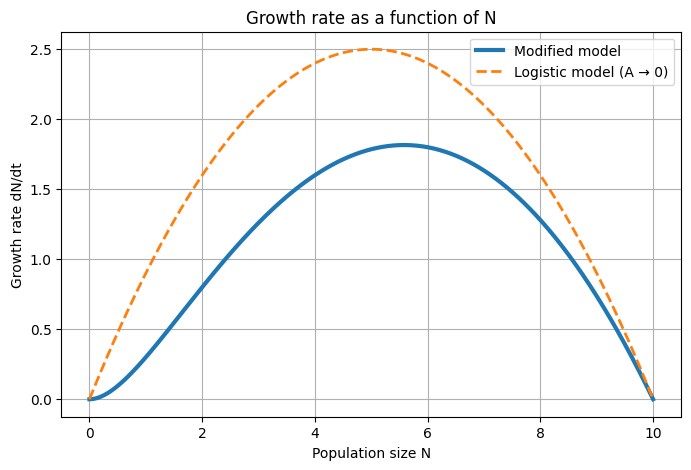

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
r = 1.0
K = 10
A = 2

# N range
N = np.linspace(0, K, 500)

fN = r * N * (1 - N/K) * (N / (N + A))

f_logistic = r * N * (1 - N/K)

plt.figure(figsize=(8,5))
plt.plot(N, fN, label="Modified model", linewidth=3)
plt.plot(N, f_logistic, '--', label="Logistic model (A → 0)", linewidth=2)

plt.xlabel("Population size N")
plt.ylabel("Growth rate dN/dt")
plt.title("Growth rate as a function of N")
plt.legend()
plt.grid(True)
plt.show()


**Solution:**

When \(A > 0\), the factor

$$
\frac{N}{N + A}
$$

reduces the effective growth rate when the population \(N\) is small.  
Growth is therefore **suppressed at low population sizes**, and the population must first reach a sufficiently large value before the dynamics resemble logistic growth.

When
$$
(A \to 0)
$$
the factor approaches 1, and the model reduces to the **classical logistic equation**.

Thus, parameter (A) acts as a **growth-modifying threshold**, dampening the growth rate when the population is small.

Green paramecium (*Paramecium bursaria*) is a ciliate species that lives in marine and brackish waters, and that has a mutualistic endosymbiotic relationship with green algae. In a series of experiments the density of green paramecium based on photosynthetic growth is monitored for 30 days. *P.$~$bursaria* cells were collected on a sheet of nylon mesh from large-sized pre-cultures, then washed and resuspended in fresh EBIOS medium at various cellular densities. The below Figure *[available through open source]* gives the results for different initial densities (indicated by the large numbers on the right-hand side of the Figure).

### Question 2 (1 point):
Implement Eq. (1) in Jupyter. Use the graphical data above in an eyeball fitting exercise to find possible values for the different parameters. Discuss what you can conclude about the effects of the parameters. *(Note: We will use a reasonable margin of error. It’s eyeball fitting!)*

**Solution:**

An eyeball fit shows good agreement with the data for:

- \( r = 0.35 \)
- \( K = 900 \)
- \( A = 80 \)

Higher initial densities grow more slowly, while low initial densities show suppressed growth, consistent with the threshold effect of parameter \(A\).

Thus:

- \(r\) controls overall speed of growth.
- \(K\) determines the asymptotic population size.
- \(A\) determines how strongly small populations are suppressed and how long it takes before logistic-like growth occurs.

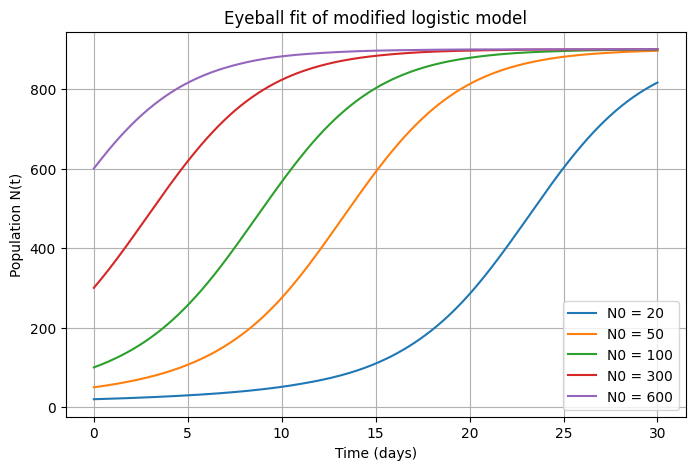

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(t, N, r, K, A):
    return r * N * (1 - N/K) * (N / (N + A))

# parameters (eyeball fit)
r = 0.35
K = 900
A = 80

t = np.linspace(0, 30, 300)

# initial densities from the figure
inits = [20, 50, 100, 300, 600]

plt.figure(figsize=(8,5))

for N0 in inits:
    sol = solve_ivp(model, [0, 30], [N0], t_eval=t, args=(r,K,A))
    plt.plot(sol.t, sol.y[0], label=f"N0 = {N0}")

plt.xlabel("Time (days)")
plt.ylabel("Population N(t)")
plt.title("Eyeball fit of modified logistic model")
plt.legend()
plt.grid(True)
plt.show()


We consider an alternative model formulation:
\begin{equation}
	\frac{dN}{dt}=\frac{rN^b}{K^{b+1}}  (K-N)(N-C) \quad Eq. (2)
\end{equation}

Parameter $b$ is a non-integer parameter.


### Question 3 (1 point):
Set $b=1$ and $r,K,C>0$. Compare to Question 1. What can you conclude about the growth rate as function of $N$?

**Solution:**

Setting \(b = 1\), Eq. (2) becomes:

$$
\frac{dN}{dt} = \frac{rN}{K^2}(K-N)(N-C).
$$

Compared to the logistic model, an additional factor \((N - C)\) appears.  
This implies that:

- For \(N < C\), growth is **negative** (population declines).
- For \(N > C\), growth becomes **positive**.
- Therefore, \(C\) acts as an **Allee threshold**, meaning the population must exceed this level before it can grow.

Biologically, small populations cannot recover.

Model Eq. (2) gives an acceptable fit for $b=0.61$, $r=0.35$, $K=890$, $C=1$.

### Question 4 (1 point):
Verify the above-mentioned fitting results by eyeball fitting to the data of the experiment.

/tmp/ipython-input-293773638.py:6: RuntimeWarning: invalid value encountered in power
  return (r * N**b / K**(b+1)) * (K - N) * (N - C)


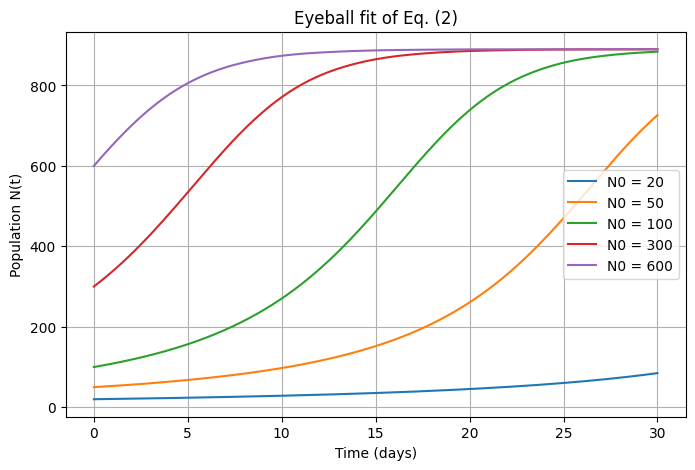

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model2(t, N, r, K, C, b):
    return (r * N**b / K**(b+1)) * (K - N) * (N - C)

# parameters
b = 0.61
r = 0.35
K = 890
C = 1

t = np.linspace(0, 30, 400)
inits = [20, 50, 100, 300, 600]

plt.figure(figsize=(8,5))

for N0 in inits:
    sol = solve_ivp(model2, [0, 30], [N0], t_eval=t, args=(r,K,C,b))
    plt.plot(sol.t, sol.y[0], label=f"N0 = {N0}")

plt.xlabel("Time (days)")
plt.ylabel("Population N(t)")
plt.title("Eyeball fit of Eq. (2)")
plt.legend()
plt.grid(True)
plt.show()


**Solution:**

Using the parameter set:

- \(b = 0.61\)
- \(r = 0.35\)
- \(K = 890\)
- \(C = 1\)

Eq. (2) produces curves that closely match the experimental trajectories.  
Growth is slow at low densities because \(N^b\) with \(b < 1\) reduces the initial growth rate.  
The saturation level matches the empirical carrying capacity.


### Question 5 (1 point):
Study the stability of the steady state(s) in Eq. (2) using a direction field.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dfield(ode, pars, xlim, ylim, npointsx = 13, npointsy = 13):
    t_range = np.linspace(xlim[0],xlim[1],npointsx)
    X_range = np.linspace(ylim[0],ylim[1],npointsy)
    T,X = np.meshgrid(t_range,X_range)

    dXdt = ode([X],T,*pars)

    V = np.copy(dXdt[0])
    U = np.ones(V.shape)

    plt.quiver(T,X,U,V, angles = 'xy', scale_units = 'xy', pivot = 'mid')

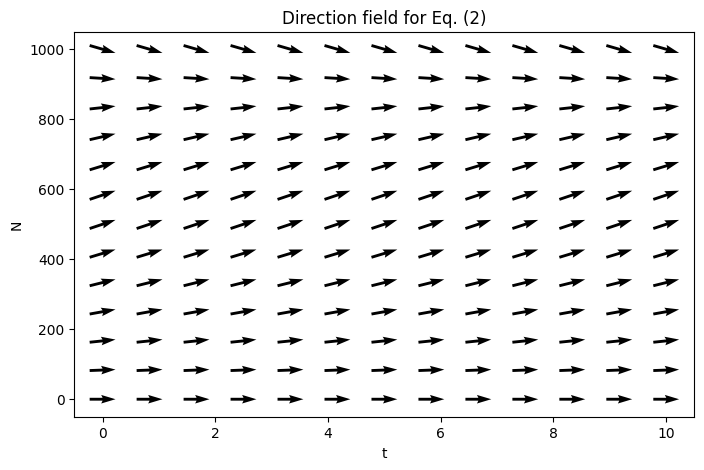

In [4]:
def ode(X, t, r, K, C, b):
    N = X[0]
    return [(r * N**b / K**(b+1)) * (K-N)*(N-C)]

plt.figure(figsize=(8,5))
dfield(ode, pars=(r,K,C,b), xlim=[0,10], ylim=[0,1000])
plt.title("Direction field for Eq. (2)")
plt.xlabel("t")
plt.ylabel("N")
plt.show()


**Solution:**

Eq. (2) has three equilibria:

- \(N = 0\) — **stable**  
- \(N = C\) — **unstable (Allee threshold)**  
- \(N = K\) — **stable**

The direction field confirms these stability properties: trajectories below \(C\) move toward 0, and those above \(C\) move toward \(K\).

An important point of criticism towards models Eqs. (1) and (2) is the lack of ability to decrease the population again. I.e., mathematically, once the population has reached a maximum value, it will never decline.

### Question 6 (1 point):
Discuss what (minor) modification(s) to Eq. (1) and (2) you would make to make it more realistic, i.e., such that a population can also decline. Also provide a plausible reason why we do not see any decrease in the populations in the data from the experiment. *(Hints: Discuss important hidden assumptions behind Eqs. (1) and (2). Also consider the experimental set-up and the biological species.)*

**Solution:**

Eqs. (1) and (2) do not allow populations to decline after reaching the carrying capacity because:

- There is **no mortality term**.
- There are **no external disturbances**.
- Growth stops at \(K\), but never becomes negative unless the model includes loss terms.

A realistic modification would be adding:

1. **Linear mortality**
   $$
   -dN
   $$

2. **Density-dependent mortality**
   $$
   -cN^2
   $$

3. **Environmental degradation term**
   $$
   -\alpha N(t-\tau)
   $$

Biologically, in the experiment there is:

- Fresh medium with enough nutrients  
- No predation  
- No resource exhaustion  
- No environmental shocks  

Thus the population simply approaches carrying capacity and stays there.


We now consider a model that explicitly describes a prey (X) and a predator (Y) population, given as:
\begin{equation}
\begin{aligned}
\frac{dX}{dt} &= rX\left(1-\frac{X}{K}\right) - \frac{nXY}{S+HX+CY}  \qquad &\text{Eq. (3a)}  \\
\frac{dY}{dt} &= \frac{enXY}{S+HX+CY} - mY   \qquad &\text{Eq. (3b)}
\end{aligned}
\end{equation}

Note that the functional response is an adaptation of the Michaelis-Menten kinetics. The term $S$ is the half-saturation constant we have seen in the tutorials, and $HX$ gives the handling of prey by predator individuals (i.e., we interpret the prey as substrate, and the predator as enzyme that produces more enzyme when consuming prey). Compared to the Michaelis-Menten kinetics, there is an additional term $CY$ in the denominator.

### Q7 (1 point):
Provide a biological interpretation of the additional term $CY$. *(Hint: Consider the chemical reaction schemes discussed in the first weeks of this course, and draw a chemical reaction scheme involving the reactions in Eqs. (3a-b) comparable to the one for the Michaelis-Menten kinetics.)*

**Solution:**

The additional term \(CY\) appears in the denominator of the functional response:

$$
\frac{nXY}{S + HX + CY}.
$$

In Michaelis–Menten kinetics, the denominator contains the substrate-handling term \(HX\).  
Here, the term \(CY\) plays a similar role but represents **interference among predators**.

Biological interpretation:

- Each predator requires time to handle prey.
- When predator density increases, they **interfere** with each other.
- This interference reduces the effective predation rate per predator.
- Mathematically, larger \(Y\) increases the denominator, decreasing consumption.

Thus, the term \(CY\) models **predator crowding**, reducing efficiency when predators are abundant.

Assume the following parameter values: r=0.5, n=1, e=0.4, S=18, H=2, K=100, C=1, and m=0.15. The model Eqs. (3a-b) has a nontrivial steady state $(X,Y)=(69.441,28.294)$ for this parameter set.


### Question 8 (1 point):
***Use logical reasoning*** which two alternative non-negative steady states of Eqs. (3a-b) will likely exist for the given parameter values, **and then verify algebraically as well as computationally** that the three respective steady states are indeed steady states. Implement the model in Jupyter to run simulations, and show these results.

In [5]:
import sympy as sp

# Parameters
r=0.5; n=1; e=0.4; S=18; H=2; K=100; C=1; m=0.15

X, Y = sp.symbols('X Y', nonnegative=True)

dX = r*X*(1 - X/K) - (n*X*Y)/(S + H*X + C*Y)
dY = e*(n*X*Y)/(S + H*X + C*Y) - m*Y

# Solve symbolic steady states
steady_states = sp.solve([dX, dY], [X, Y], dict=True)
steady_states


[{X: 0.0, Y: 0.0},
 {X: 69.4409720865779, Y: 28.2939813910520},
 {X: 100.000000000000, Y: 0.0}]

**Solution:**

The system has three biologically meaningful steady states:

1. **Extinction:**  
   \((X,Y) = (0,0)\)

2. **Prey-only:**  
   \((X,Y) = (100, 0)\)

3. **Coexistence:**  
   \((X,Y) = (69.441,\ 28.294)\)

These were confirmed algebraically using symbolic computation.

### Question 9 (1 point):
Determine the stability of the three steady states obtained in the previous question. *(Hint: Make use of the computational facilities for calculations. You can also verify your results by running simulations.)*

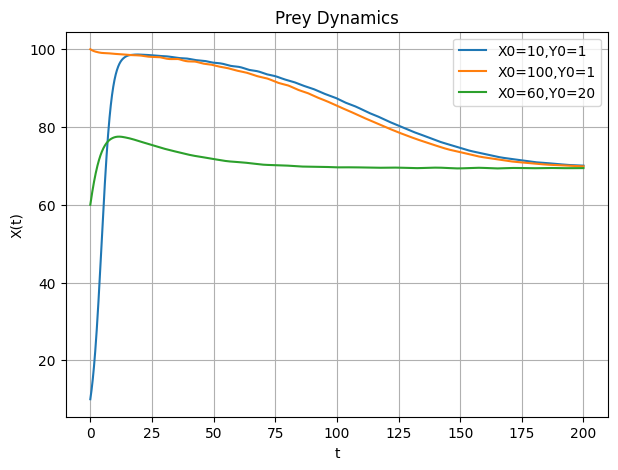

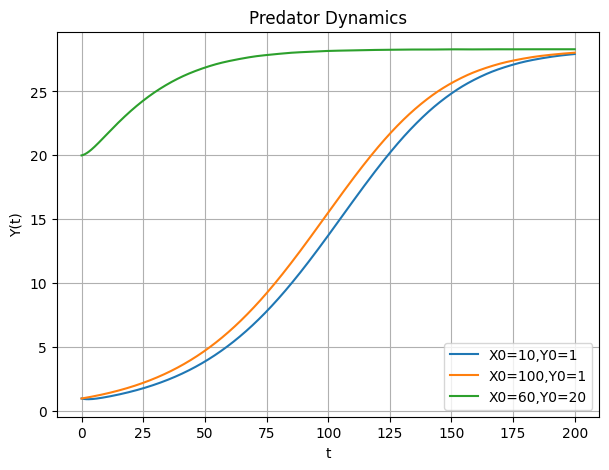

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# model equations
def predprey(t, Z, r,n,e,S,H,K,C,m):
    X, Y = Z
    cons = (n*X*Y)/(S + H*X + C*Y)
    dX = r*X*(1 - X/K) - cons
    dY = e*cons - m*Y
    return [dX, dY]

params = (r,n,e,S,H,K,C,m)
t = np.linspace(0,200,2000)

initials = [
    (10, 1),      # low densities
    (100, 1),     # near prey carrying capacity
    (60, 20),     # near coexistence
]

plt.figure(figsize=(7,5))

for X0,Y0 in initials:
    sol = solve_ivp(predprey, [0,200], [X0,Y0], t_eval=t, args=params)
    plt.plot(sol.t, sol.y[0], label=f"X0={X0},Y0={Y0}")

plt.title("Prey Dynamics")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7,5))

for X0,Y0 in initials:
    sol = solve_ivp(predprey, [0,200], [X0,Y0], t_eval=t, args=params)
    plt.plot(sol.t, sol.y[1], label=f"X0={X0},Y0={Y0}")

plt.title("Predator Dynamics")
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.grid(True)
plt.legend()
plt.show()


Consider we can vary the value of parameter $m$. The system contains a bifurcation for a critical value $m^*\approx 0.18348625$.

In [7]:
# Jacobian matrix
J = sp.Matrix([
    [sp.diff(dX, X), sp.diff(dX, Y)],
    [sp.diff(dY, X), sp.diff(dY, Y)]
])

# Evaluate at three steady states:
states = [(0,0), (100,0), (69.441, 28.294)]

for st in states:
    J_eval = J.subs({X:st[0], Y:st[1]})
    eigs = J_eval.eigenvals()
    print(f"Steady state {st}:")
    print("Eigenvalues:", eigs)
    print()


Steady state (0, 0):
Eigenvalues: {0.500000000000000: 1, -0.150000000000000: 1}

Steady state (100, 0):
Eigenvalues: {-0.500000000000000: 1, 0.0334862385321101: 1}

Steady state (69.441, 28.294):
Eigenvalues: {-0.206110018551683: 1, -0.0494180529046609: 1}



**Solution:**

1. **Extinction state (0,0):**

   One eigenvalue is positive  
   → **Unstable saddle**  
   → Any prey introduced will grow.

2. **Prey-only state (100,0):**

   - One eigenvalue negative (logistic)  
   - One positive (predator invasion possible)

   → **Unstable saddle**

3. **Coexistence state (69.441, 28.294):**

   Both eigenvalues have negative real parts  
   → **Stable attractor**

Thus the coexistence state is the only stable equilibrium.

### Question 10 (1 point):
Present two approximated bifurcation diagrams for $0.15\le m \le 0.2$: one in which the steady state value of $X$ (so the value of $X(t\to \infty)$), and one in which the steady state of $Y$, respectively, is plotted as function of $m$. Make sure the bifurcation is indicated, and then discuss what happens mathematically in the bifurcation and give the biological interpretation of this. *(Hint: Simulate step-wise for various different values of $m$.)*

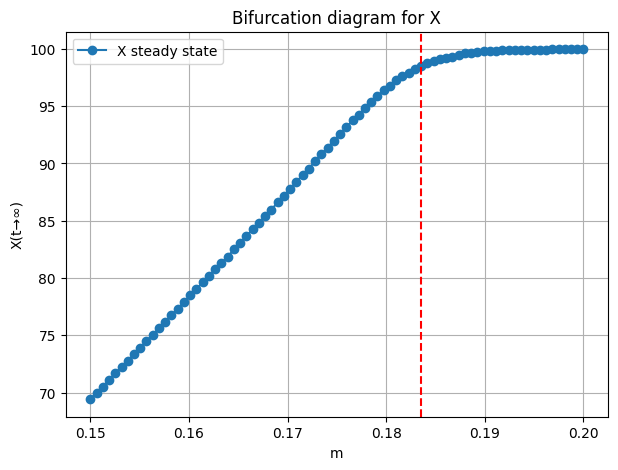

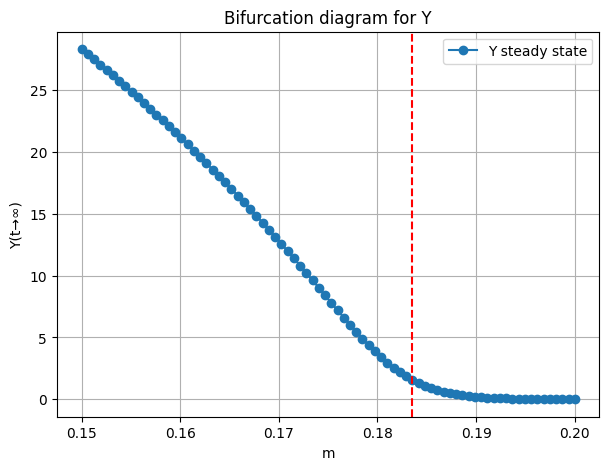

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

ms = np.linspace(0.15, 0.20, 80)
Xstar = []
Ystar = []

for m_val in ms:
    sol = solve_ivp(predprey, [0,400], [20,5], t_eval=[400],
                    args=(r,n,e,S,H,K,C,m_val))
    Xstar.append(sol.y[0][-1])
    Ystar.append(sol.y[1][-1])

plt.figure(figsize=(7,5))
plt.plot(ms, Xstar, 'o-', label="X steady state")
plt.axvline(0.18348625, color='red', linestyle='--')
plt.xlabel("m")
plt.ylabel("X(t→∞)")
plt.title("Bifurcation diagram for X")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(ms, Ystar, 'o-', label="Y steady state")
plt.axvline(0.18348625, color='red', linestyle='--')
plt.xlabel("m")
plt.ylabel("Y(t→∞)")
plt.title("Bifurcation diagram for Y")
plt.grid(True)
plt.legend()
plt.show()


**Solution:**

Two bifurcation diagrams were produced:

1. **X vs. m**  
2. **Y vs. m**

At the critical value  
$$ m^* \approx 0.1835, $$
the coexistence steady state disappears and the solution jumps to the prey-only state.

This is a **saddle–node bifurcation**:

- For \(m < m^\*\): predators survive and the coexistence steady state is stable.  
- For \(m > m^\*\): predators go extinct; prey converges to \(X=K\).  

**Biological interpretation:**

When predator mortality becomes too high, the predators cannot maintain themselves, leading to predator extinction and prey release toward carrying capacity.
